In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(10000,)

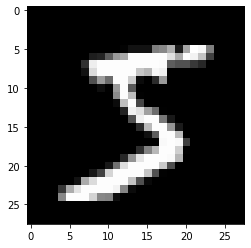

In [5]:
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

In [6]:
y_train[0]

5

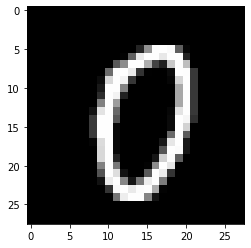

In [7]:
plt.imshow(X_train[1000], cmap = 'gray')
plt.show()

In [8]:
y_train[1000]

0

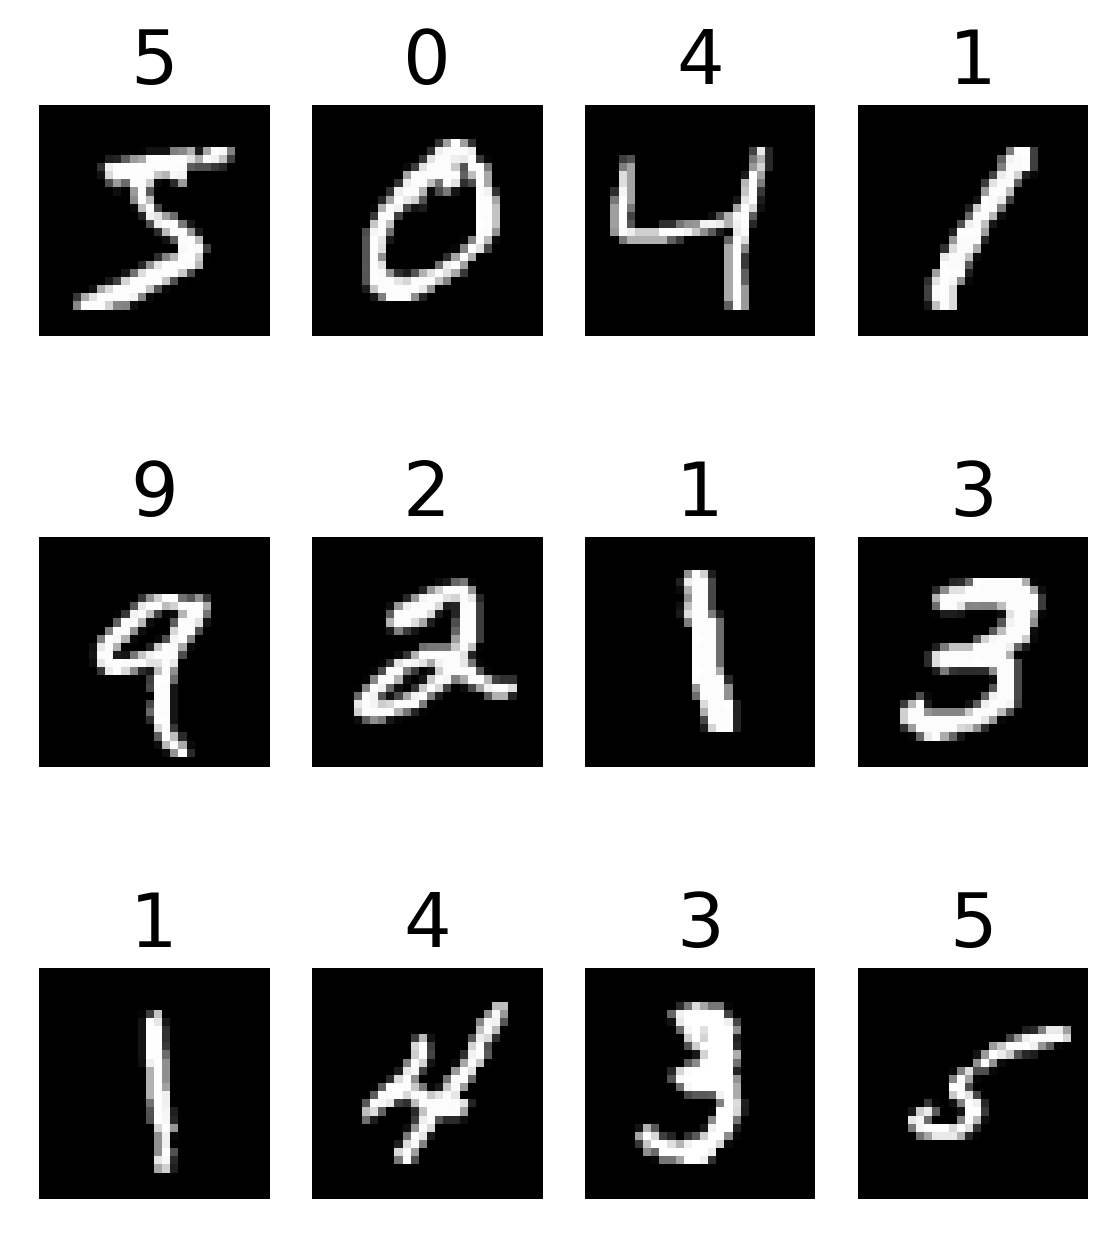

In [9]:
plt.figure(figsize =(5,6), dpi = 270)

for i in range(12):
    
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title('{}'.format(y_train[i]), fontsize = 20)
    plt.xticks([])
    plt.yticks([])



plt.show()

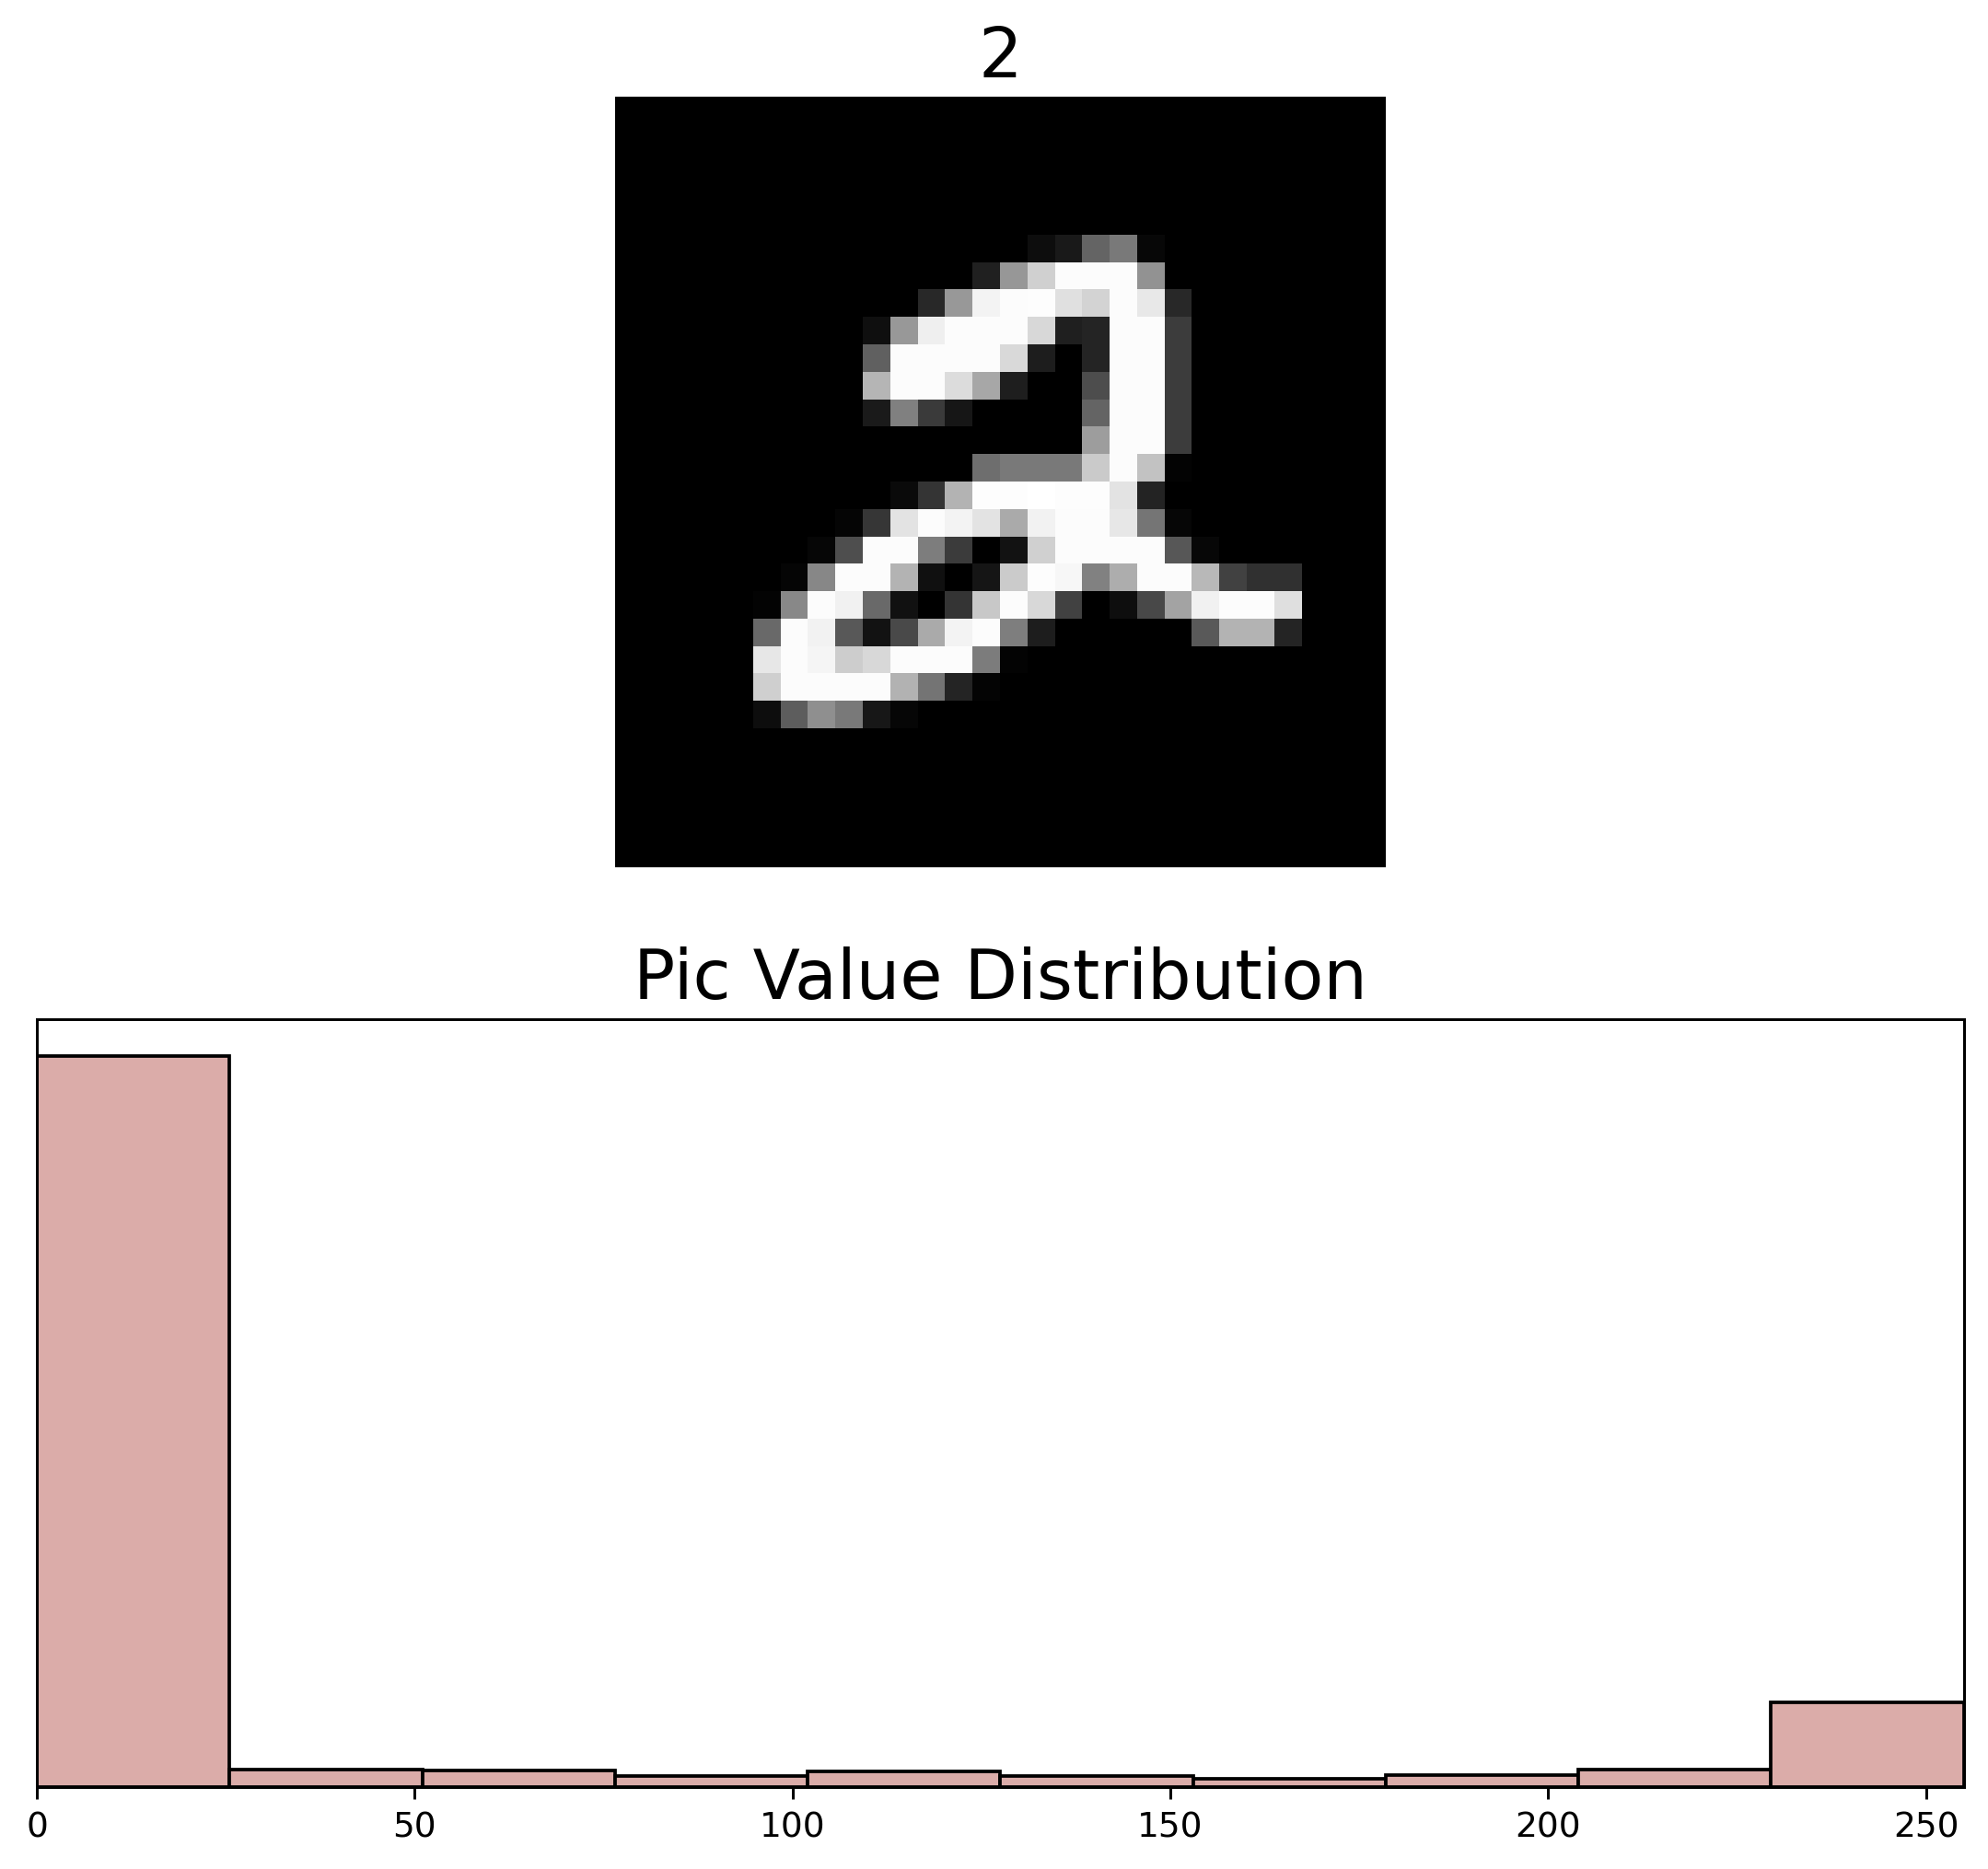

In [10]:
plt.figure(figsize =(10,9), dpi = 270)
plt.subplot(2,1,1)
plt.imshow(X_train[5], cmap='gray')
plt.title('{}'.format(y_train[5]), fontsize = 20)
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[5].reshape(784), bins = 10, color = '#dbaca9', ec = 'black')
plt.title('Pic Value Distribution', fontsize = 20)
plt.xlim(0,255)
plt.yticks([])
plt.show()

In [11]:
# checking the shape
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [12]:
# Precprocessing
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [13]:
# Dividing by 255.....normalizing the data
X_train, X_test = X_train/255, X_test/255

In [14]:
# Data after preprocessing shape
print('X_train:  shape:', X_train.shape)
print('X_test:   shape:', X_test.shape)

X_train:  shape: (60000, 784)
X_test:   shape: (10000, 784)


In [15]:
model = Sequential()
model.add(Dropout(0.2, seed=42, input_shape=(784,), name = 'm3_drop_out_1'))
model.add(Dense(128, activation='relu', name='m3_hidden1'))
model.add(Dropout(0.2, seed=42, name ='m3_drop_out_2' ))
model.add(Dense(64, activation='relu', name='m3_hidden2'))
model.add(Dense(15, activation='relu', name='m3_hidden3'))
model.add(Dense(10, activation='softmax', name='m3_output'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m3_drop_out_1 (Dropout)     (None, 784)               0         
                                                                 
 m3_hidden1 (Dense)          (None, 128)               100480    
                                                                 
 m3_drop_out_2 (Dropout)     (None, 128)               0         
                                                                 
 m3_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m3_hidden3 (Dense)          (None, 15)                975       
                                                                 
 m3_output (Dense)           (None, 10)                160       
                                                                 
Total params: 109,871
Trainable params: 109,871
Non-trai

In [17]:
history = model.fit(X_train, y_train, batch_size=1000, epochs= 10,verbose=1)
print(history.history.keys())


Epoch 1/10
60/60 [==============================] - 2s 17ms/step - loss: 1.2646 - accuracy: 0.5792
Epoch 2/10
60/60 [==============================] - 1s 16ms/step - loss: 0.4254 - accuracy: 0.8768
Epoch 3/10
60/60 [==============================] - 1s 16ms/step - loss: 0.3036 - accuracy: 0.9117
Epoch 4/10
60/60 [==============================] - 1s 16ms/step - loss: 0.2458 - accuracy: 0.9276
Epoch 5/10
60/60 [==============================] - 1s 16ms/step - loss: 0.2129 - accuracy: 0.9362
Epoch 6/10
60/60 [==============================] - 1s 17ms/step - loss: 0.1870 - accuracy: 0.9441
Epoch 7/10
60/60 [==============================] - 1s 16ms/step - loss: 0.1693 - accuracy: 0.9483
Epoch 8/10
60/60 [==============================] - 1s 16ms/step - loss: 0.1534 - accuracy: 0.9536
Epoch 9/10
60/60 [==============================] - 1s 16ms/step - loss: 0.1439 - accuracy: 0.9563
Epoch 10/10
60/60 [==============================] - 1s 16ms/step - loss: 0.1349 - accuracy: 0.9584
dict_keys

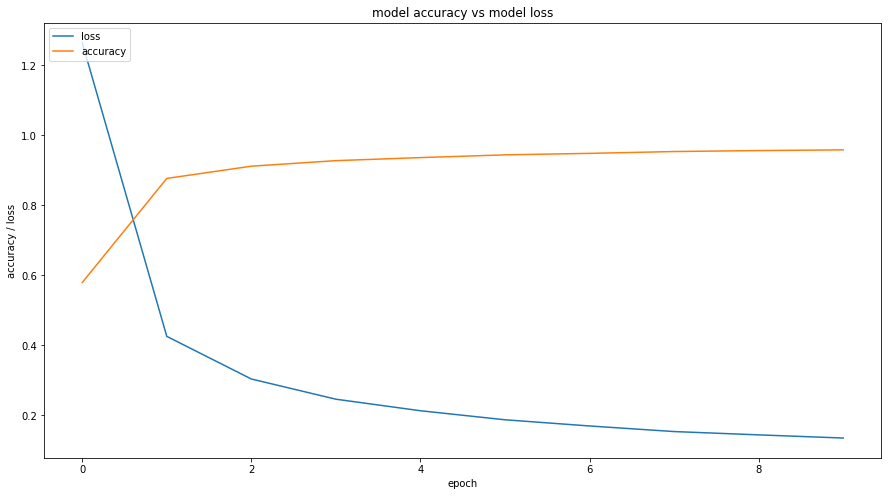

In [18]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy vs model loss')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

In [19]:
loss_and_metrics = model.evaluate(X_test, y_test, verbose=1)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9686
Test Loss 0.09500479698181152
Test Accuracy 0.9685999751091003


In [20]:
prediction = np.argmax(model.predict(X_test), axis =1)
correct = np.nonzero(prediction == y_test)[0]
incorrect = np.nonzero(prediction != y_test)[0]

313/313 [==============================] - 0s 1ms/step


In [21]:
type(prediction)

numpy.ndarray

In [22]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
prediction.shape

(10000,)

In [24]:
print(len(correct),'  :   classified correctly')
print(len(incorrect),'   : classified incorrectly')

9686   :   classified correctly
314    : classified incorrectly


In [25]:
list = ['test', 'must', 'rest', 'just', 'fist', 'list', 'gist']

In [26]:
for i in enumerate(list):
    print(i)

(0, 'test')
(1, 'must')
(2, 'rest')
(3, 'just')
(4, 'fist')
(5, 'list')
(6, 'gist')


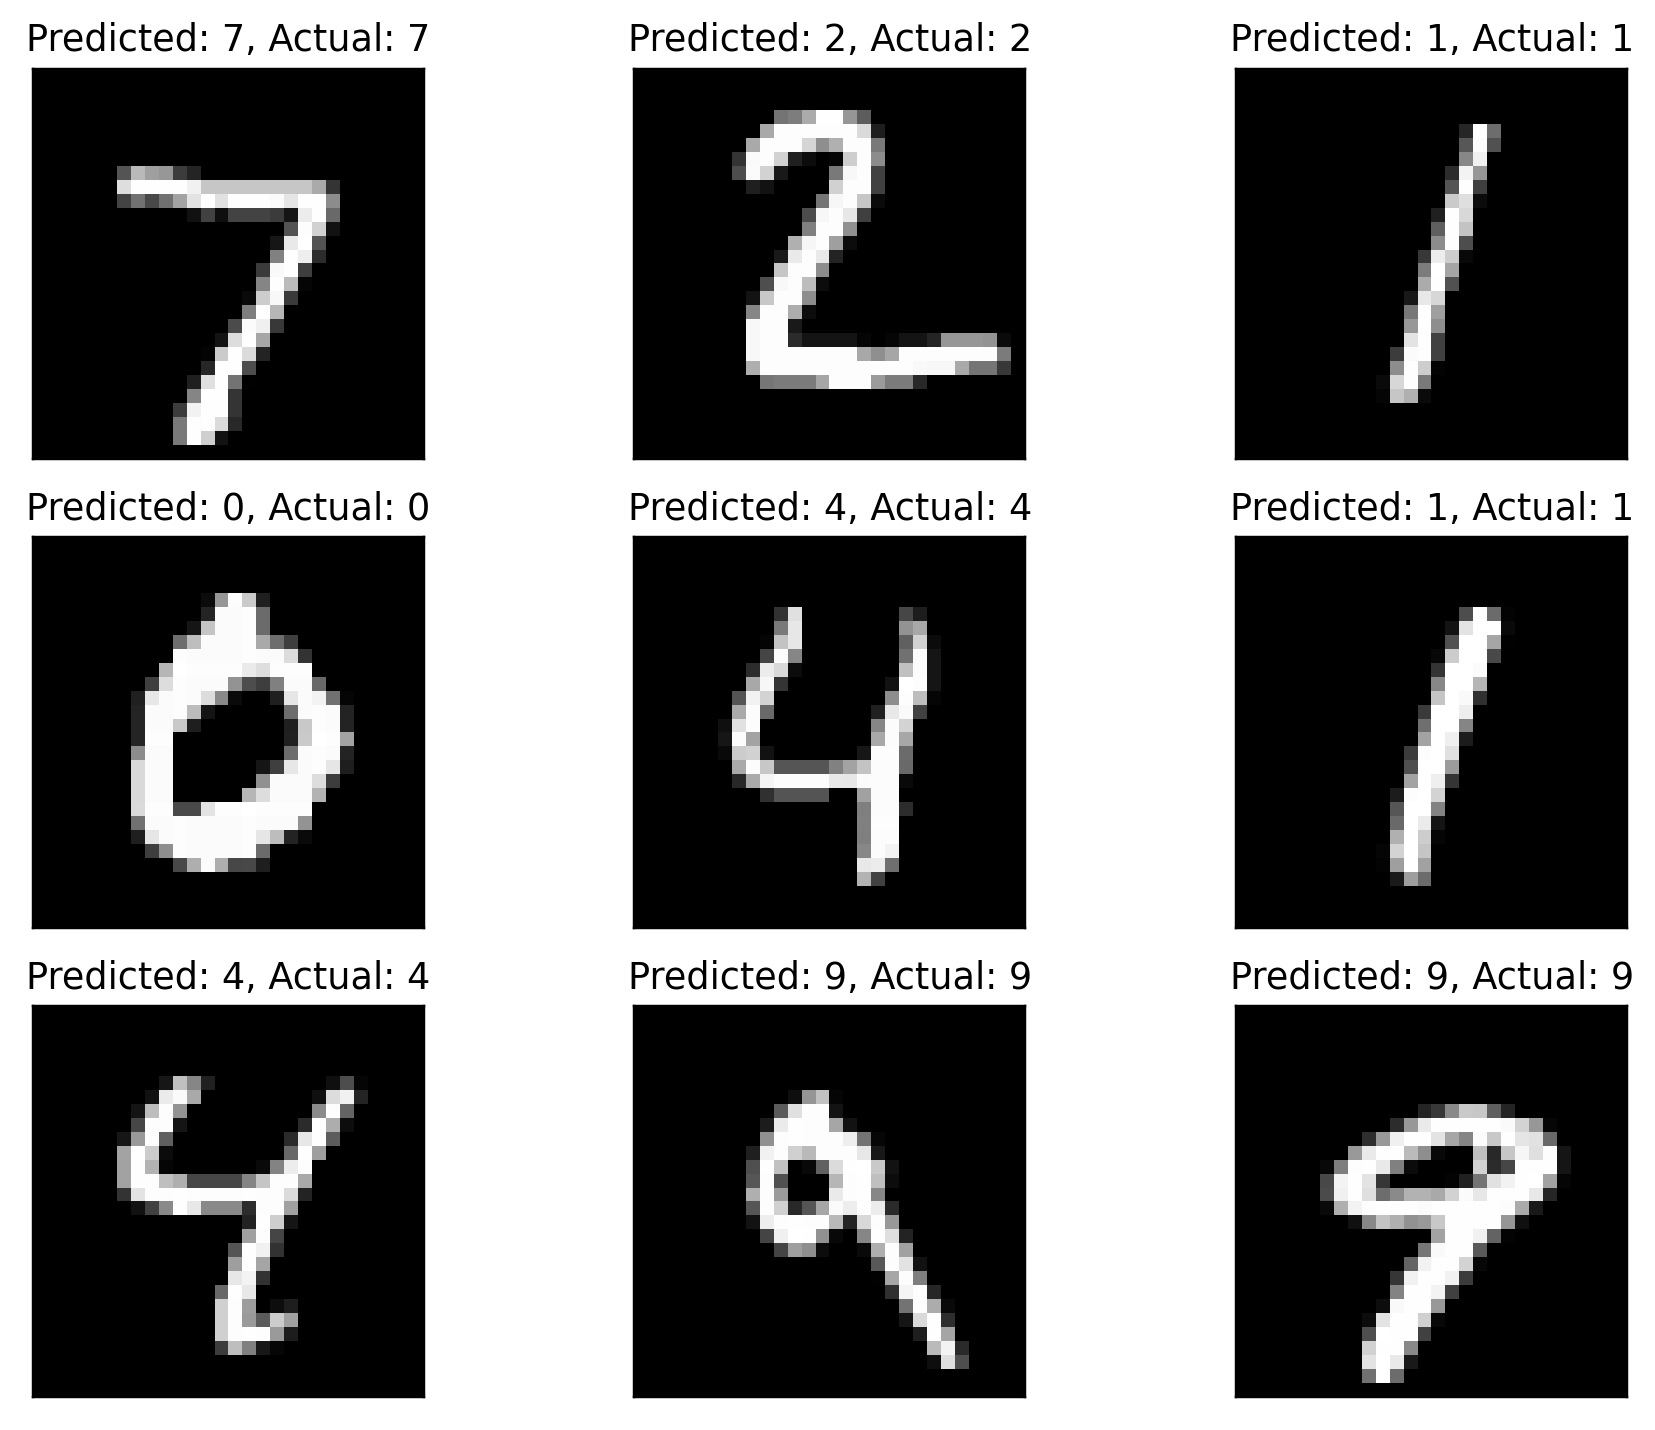

In [27]:
plt.figure(figsize =(10,8), dpi = 220)




for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
    plt.title('Predicted: {}, Actual: {}'.format(prediction[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

plt.show()

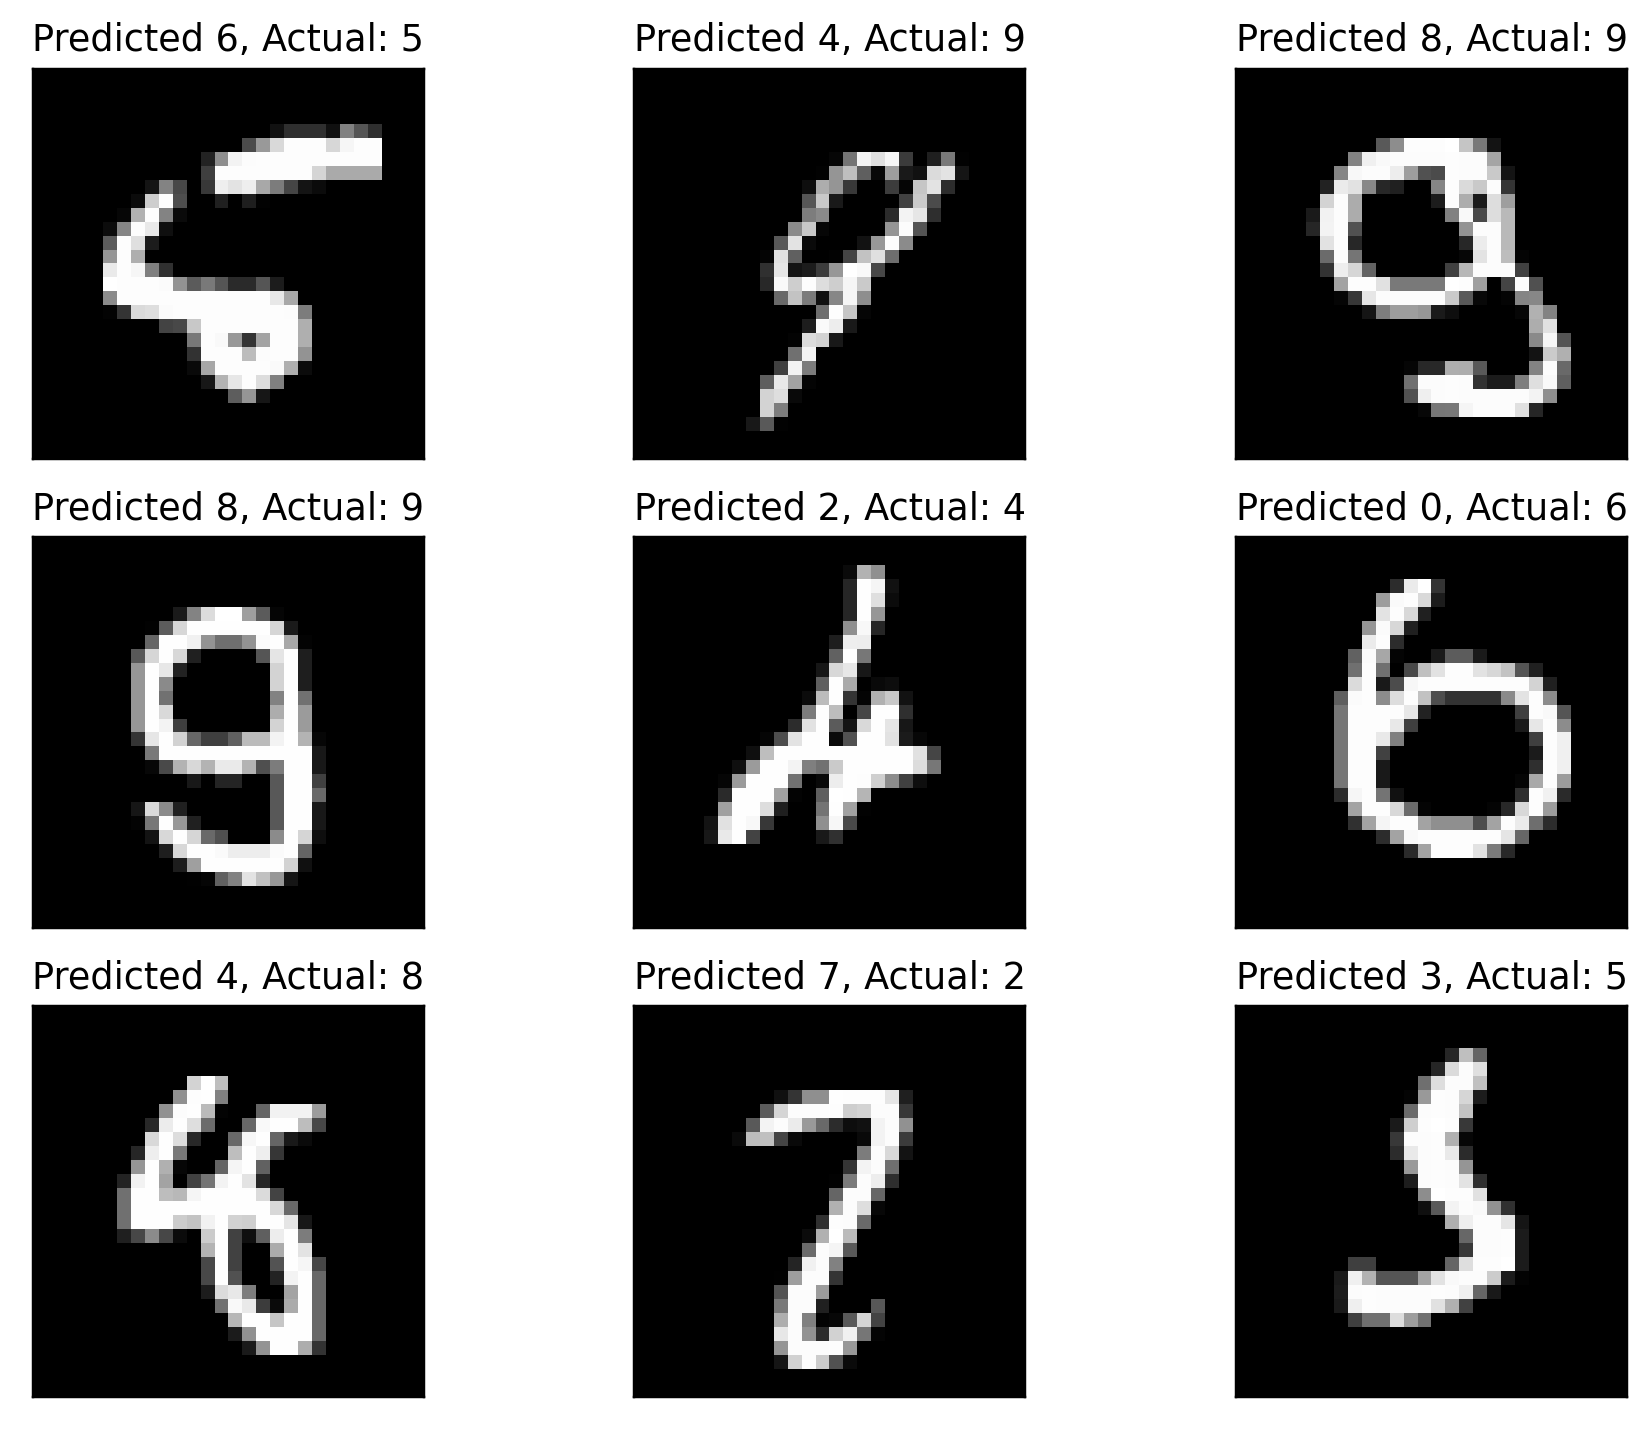

In [28]:
plt.figure(figsize =(10,8), dpi = 220)


for j, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,j+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
    plt.title('Predicted {}, Actual: {}'.format(prediction[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

plt.show()

In [29]:
from sklearn.metrics import confusion_matrix
import itertools
conf_matrix = confusion_matrix(y_true=y_test, y_pred=prediction)

In [30]:
conf_matrix

array([[ 972,    0,    0,    1,    0,    0,    3,    1,    3,    0],
       [   0, 1122,    5,    0,    0,    0,    3,    0,    5,    0],
       [   6,    1,  997,    7,    3,    0,    1,    5,   12,    0],
       [   0,    0,   10,  971,    0,    2,    1,   10,   13,    3],
       [   1,    0,    8,    0,  958,    0,    3,    2,    1,    9],
       [   4,    1,    0,   13,    3,  848,    8,    2,   10,    3],
       [   8,    3,    0,    0,    4,    6,  931,    0,    6,    0],
       [   2,    7,   18,    0,    1,    0,    0,  985,    3,   12],
       [   5,    0,    2,    6,    6,    1,    3,    3,  945,    3],
       [   5,    5,    1,    7,   16,    1,    0,    6,   11,  957]])

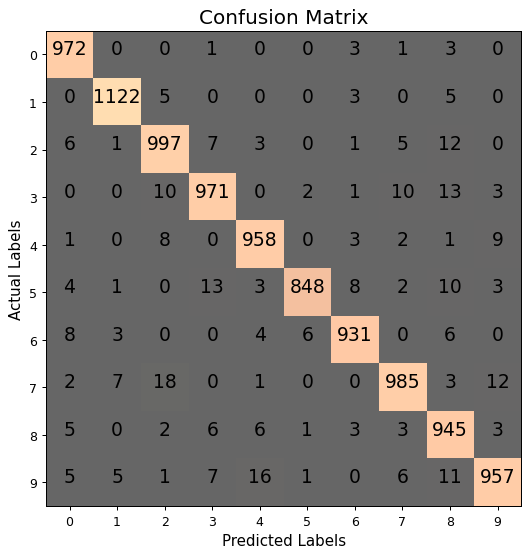

In [31]:
NR_CLASSES =10
LABEL_NAMES = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(7,7), dpi = 90)

plt.imshow(conf_matrix, cmap=plt.cm.copper, alpha = 0.6)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)



for i, j in itertools.product(range(10), range(10)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',color='black', fontsize = 15)

    

plt.show()

In [32]:
# True Positives
np.diag(conf_matrix)

array([ 972, 1122,  997,  971,  958,  848,  931,  985,  945,  957])

In [33]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.99183673, 0.98854626, 0.96608527, 0.96138614, 0.97556008,
       0.95067265, 0.97181628, 0.95817121, 0.97022587, 0.94846383])

In [34]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.96909272, 0.98507463, 0.95773295, 0.96616915, 0.9667003 ,
       0.98834499, 0.97691501, 0.97140039, 0.93657086, 0.96960486])

In [35]:
avg_recall = np.mean(recall)
print(f'Model 1 recall score is {avg_recall:.2%}')

Model 1 recall score is 96.83%


In [36]:
avg_precision = np.mean(precision)
print(f'Model 1 precision score is {avg_precision:.2%}')

Model 1 precision score is 96.88%


In [37]:
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 1 f score is {f1_score:.2%}')

Model 1 f score is 96.85%
